# MNIST - by hand

In [16]:
import pandas as pd
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import copy

In [49]:
data = pd.read_csv("/home/kuba/wakacje/machine lerning/train.csv")

In [52]:
data = np.array(data)
X_ = data[:,1:]
y_ = data[:,0]

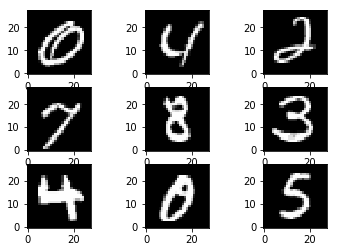

In [196]:
# lets see how does it look 
p = [[0 for i in range(28)]for i in range(28) ]

# we randomly choose 9 images 
rand = np.random.randint(0,28000,9)


fig = plt.figure()
# which plot
k = 0
for rand_ind in rand:
    
    for i in range(27):
        pixels = X_[rand_ind,::-1]
        p[i] = list(pixels[28*i:28*(i+1)])
    p = np.fliplr(p)
    # 3x3 grid and which plot
    fig.add_subplot(331 + k)
    k += 1
    plt.imshow(p, 'gray', origin='lower',interpolation='none')

plt.show()

In [173]:
# Let's choose architecture for our NN

# input layer
L1 = X_.shape[1]
#hidden layers: 
L2 = 25
L3 = 25
# output layer 
L4 = 10

def random_thetas(L1,L2,L3,L4):
    eps = np.sqrt(6)/np.sqrt(L1 + L4)
    size = (L1+1)*L2 + (L2+1)*L3 + (L3+1)*L4
    thetas = np.random.uniform(-eps,eps,size)
    return thetas
thetas = random_thetas(L1,L2,L3,L4)

In [7]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [55]:
# Let's make cost function
def CostFunction(thetas, L1, L2, L3, L4, X, y , lambda_ = 0.0): 
    """
    thetas - numpy list of parameters, expected random
    L1, ..., L4 - layer sizes
    X, y - Data numpy nd arrays
    """
    # firstly we roll out thetas to matrices of layer parameters, 
    downfrom, upto = 0, (L1+1)*L2
    theta1 = thetas[downfrom:upto].reshape(L1+1,L2)
    downfrom, upto = upto, upto + (L2+1)*L3
    theta2 = thetas[downfrom:upto].reshape(L2+1,L3)
    downfrom, upto = upto, 0
    theta3 = thetas[downfrom:].reshape(L3+1,L4)
    
    # size of dataset
    m = y.size
    
    # future gradients
    Theta1_grad = np.zeros((theta1.shape))
    Theta2_grad = np.zeros((theta2.shape))
    Theta3_grad = np.zeros((theta3.shape))
    
    # changing y to vector 
    y_vec = np.zeros((m,L4))
    for i in range(m): 
        y_vec[i,y[i]] = 1
    
    # forward Propagation 

    a1 = np.c_[np.ones((m,1)),X]   # m x n+1

    a2 = sigmoid( a1 @ theta1) 
    a2 = np.c_[np.ones((m,1)),a2]

    a3 = sigmoid( a2 @ theta2) 
    a3 = np.c_[np.ones((m,1)),a3]

    a4 = sigmoid( a3 @ theta3)

    # value of cost is not vectorized because of memory reasons
    J = 0
    for i in range(m) :
        J += (1/m)* (np.log(a4[i,:]) @ (-y_vec[i,:]).T - (np.log(1 - a4[i,:])) @ (1 - y_vec[i,:]).T)    

    # without biases
    t1 = theta1[:, 1:]
    t2 = theta2[:, 1:]
    t3 = theta3[:, 1:]
    reg = lambda_/(2*m) *( (t1**2).sum() + (t2**2).sum() + (t3**2).sum())  

    J = J + reg

    #backpropagation

    err4 = a4 - y_vec 

    #derivative of sigmoid is ai*(1-ai)
    err3 = (err4 @ theta3.T) * (a3*(1-a3))    #42000x10 @ 10x26 * 42000x26
    # without bias
    err3 = err3[:,1:]

    err2 = (err3 @ theta2.T) * (a2*(1-a2))
    err2 = err2[:,1:]

    delta1 = a1.T @ err2
    delta2 = a2.T @ err3 
    delta3 = a3.T @ err4

    d1 = lambda_/m * theta1[:,1:]
    d2 = lambda_/m * theta2[:,1:]
    d3 = lambda_/m * theta3[:,1:]

    Theta1_grad = delta1/m
    Theta2_grad = delta2/m    
    Theta3_grad = delta3/m

    Theta1_grad[:,1:] += d1
    Theta2_grad[:,1:] += d2
    Theta3_grad[:,1:] += d3

    return J, np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel(), Theta3_grad.ravel()])

In [25]:
# # to chceck if we have non-buggy implementation we should run this
# J, grad = CostFunction(thetas, L1, L2,L3,L4,X,y)
# m = grad.size
# grad2 = np.zeros(m)

# epsilon = 0.0001

# for i in range(m): 
#     thetas_1 = copy.copy(thetas)
#     thetas_2 = copy.copy(thetas)
#     thetas_1[i] -= epsilon
#     thetas_2[i] -= epsilon

#     grad2[i] = (CostFunction(thetas_1, L1, L2,L3,L4,X,y)[0] - CostFunction(thetas_2, L1, L2,L3,L4,X,y)[0])/(2*epsilon) 

In [84]:
arr = np.arange(y_.size)
np.random.shuffle(arr)
X = X_[arr]
y = y_[arr]

X_train,X_test = X[:33600,:], X[33600:,:]
y_train, y_test = y[:33600], y[33600:]
X_train.shape

(33600, 784)

In [ ]:
def predict(thetas,L1,L2,L3,L4,X):
    
     # firstly we roll out thetas to matrices of layer parameters, 
    downfrom, upto = 0, (L1+1)*L2
    theta1 = thetas[downfrom:upto].reshape(L1+1,L2)
    downfrom, upto = upto, upto + (L2+1)*L3
    theta2 = thetas[downfrom:upto].reshape(L2+1,L3)
    downfrom, upto = upto, 0
    theta3 = thetas[downfrom:].reshape(L3+1,L4)
    
    m = X.shape[0]
    
    a1 = np.c_[np.ones((m,1)),X]   # m x n+1

    a2 = sigmoid( a1 @ theta1) 
    a2 = np.c_[np.ones((m,1)),a2]

    a3 = sigmoid( a2 @ theta2) 
    a3 = np.c_[np.ones((m,1)),a3]

    a4 = sigmoid( a3 @ theta3)
    
    p = np.argmax(a4, axis = 1)
    
    return p

In [169]:
options= {'maxiter': 100}
lambda_ = 0.01


# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(CostFunction,
                        thetas,(L1,L2,L3,L4,X_train,y_train,lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

In [170]:
thetass = res.x
predictions = predict(thetass,L1,L2,L3,L4, X_test)
a = (y_test == predictions)
a.sum()/a.size

0.5807142857142857

In [175]:
options= {'maxiter': 1000}
lambda_ = 0.01
thetas.shape

(20535,)

In [179]:
out = np.zeros(10)
thetas2 = np.zeros((10,thetas.size))
for i in range(10):
    thetas = random_thetas(L1,L2,L3,L4)
    res = optimize.minimize(CostFunction,
                        thetas,(L1,L2,L3,L4,X_train,y_train,lambda_),
                        jac=True,
                        method='TNC',
                        options=options)
    thetass = res.x
    predictions = predict(thetass,L1,L2,L3,L4, X_test)
    a = (y_test == predictions)
    out[i] = a.sum()/a.size
    thetas2[i] = thetass

out, thetas2


(array([0.86119048, 0.86583333, 0.87047619, 0.89702381, 0.89297619,
        0.88547619, 0.88928571, 0.86916667, 0.8977381 , 0.84333333]),
 array([[-0.07689145, -0.02070365, -0.02069394, ...,  1.71350633,
         -0.49113205, -2.32453796],
        [ 0.04577707, -0.04807896,  0.06776028, ..., -0.83670793,
         -0.92921021, -2.81483036],
        [ 0.01457318,  0.00649148, -0.05763494, ...,  0.6214369 ,
         -1.89564025,  2.64072323],
        ...,
        [ 0.04582149,  0.05731092,  0.07140523, ...,  0.02258644,
         -1.15684717, -2.29672249],
        [ 0.03161278, -0.03381312, -0.00309615, ...,  2.06262448,
         -1.69308118, -2.85565406],
        [-0.02523666,  0.05595003,  0.01386534, ..., -1.53742995,
          1.50942734,  0.20722691]]))

In [185]:
thetas = thetas2[8]

In [187]:
options= {'maxiter': 10000}
lambda_ = 0.01


# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)

res = optimize.minimize(CostFunction,
                        thetas,(L1,L2,L3,L4,X_,y_),
                        jac=True,
                        method='TNC',
                        options=options)

In [189]:
predictions = predict(res.x,L1, L2,L3,L4, X_test)

In [190]:
a1 = (y_test == predictions)
a1.sum()/a1.size

0.9258333333333333